<center>
This is the worksheet for auxiliary computations regarding the existence of two newforms $f_1,f_2$ in level $N=p$ or $N=p^2$, such that $(f_i)_{|w_N} = f_i$ and $L'(f_i,1) \neq 0$.

First, we compute the moments 
$$ \frac{\langle a_m, L' \rangle_N^{+, \rm{new}}}{4 \pi} $$

for $m=1$ and $m=2$ given the estimates at the end of section 5 of the paper.

The only auxiliary function needed for now is the exponential integral $E_1$. The functions __sumf__ and __sumg__ are only useful for possible future computations with $m>2$. The main term for $N=p$ is given by the function __maintermp__, the error term by __errortermp__, and similarly with __maintermpsquare__ and __errortermpsquare__ for $N=p^2$. The maximal and minimal values authorised by these bounds are thus deduced.

We define first __E1__ the exponential integral function.
</center>

In [3]:
def E1(x):
    return (-Ei(-x))

<center>
The symbol $O_1(x)$ means a complex number of absolute value less than $x$. By the inequalities (33) and (34) of the paper, we have 
$$
\frac{\langle a_1, L' \rangle_N^+}{4 \pi} = E_1 (2 \pi / \sqrt{N}) + O_1 \left(\frac{86}{N}+ \frac{43 }{\sqrt{N}} \right).
$$

$$
\frac{\langle a_2, L' \rangle_N^+}{4 \pi} = E_1 (4 \pi / \sqrt{N}) + O_1 \left(\frac{213}{N}+ \frac{97 }{\sqrt{N}} \right),
$$
and this is also sufficient as for the case $N=p^2$, one has by Lemma 5.5 
$$
\langle a_m, L' \rangle_{p^2}^{+,\rm{new}} = \langle a_m, L' \rangle_{p^2}^+ - \frac{1}{p-1} \left( \langle a_m, L' \rangle_p^+ + \frac{\ln(p)}{2} \langle a_m, L \rangle_p^- \right),
$$
which gives
$$
\frac{\langle a_1,L'\rangle_{p^2}^{+,\textrm{new}}}{4 \pi} = E_1\left( \frac{2 \pi}{p} \right) - \frac{E_1 \left( \frac{2 \pi}{\sqrt{p}} \right)}{p-1}  - \frac{\ln(p) e^{- 2 \pi /\sqrt{p}}}{2(p-1)}+  O_1 \left( \frac{86}{p^2} + \frac{43}{p} + \frac{\ln(p)/2+1}{p-1} \left(\frac{86}{p} + \frac{43}{\sqrt{p}} \right) \right)
$$

$$
\frac{\langle a_2,L'\rangle_{p^2}^{+,\textrm{new}}}{4 \pi} = E_1\left( \frac{4 \pi}{p} \right) - \frac{E_1 \left( \frac{4 \pi}{\sqrt{p}} \right)}{p-1}  - \frac{\ln(p) e^{- 4 \pi /\sqrt{p}}}{2(p-1)}+  O_1 \left( \frac{213}{p^2} + \frac{97}{p} + \frac{\ln(p)/2+1}{p-1} \left(\frac{213}{p} + \frac{97}{\sqrt{p}} \right) \right).
$$

These are exactly the bounds input below in the functions __mintermp__$(m,p)$ ($m=1$ or 2), __maxtermp__$(m,p)$ for $N=p$ and __mintermpsquare__$(m,p)$, __maxtermpsquare__$(m,p)$.
</center>

In [1]:
def sumf(m):
    l=divisors(m);
    l2=map (lambda t: 1/sqrt(t), l);
    x=sum(l2);
    return x

def sumg(m):
    l=divisors(m);
    l2 = map (lambda t: sumf(t)*number_of_divisors(t)/t^(3/2), l);
    x=sum(l2);
    return RDF(x)

def maintermp(m,x):
    return E1(2*pi*m/sqrt(x))

def errortermp(m,x):
    if m==1:
        return (86/x+ 43/sqrt(x))
    elif m==2:
        return (213/x+97/sqrt(x))
    else:
        return 
def mintermp(m,x):
    return maintermp(m,x) - errortermp(m,x)

def maxtermp(m,x):
    return maintermp(m,x)+errortermp(m,x)

def maintermpsquare(m,x):
    return (E1(2*pi*m/x) - E1(2*pi*m/sqrt(x))/(x-1) - ln(x)*e^(-2*pi*m/sqrt(x))/(2*(x-1)))

def errortermpsquare(m,x):
    if m==1:
        return (86/x^2 + 43/x + 86/(x*(x-1)) + 43/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(86/x + 43/sqrt(x)))
    elif m==2:
        return (213/x^2 + 97/x + 213/(x*(x-1)) + 97/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(213/x + 97/sqrt(x)))
    else:
        return (86/x^2 + 43/x + 86/(x*(x-1)) + 43/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(86/x + 43/sqrt(x)))*sumg(m)
    
def mintermpsquare(m,x):
    return maintermpsquare(m,x)-errortermpsquare(m,x)

def maxtermpsquare(m,x):
    return maintermpsquare(m,x)+errortermpsquare(m,x)


<center>To give an idea of the convergence towards expected asymptotic behaviour of the moments, here are the plotted maximal and minimal possibles values of the moments (given the error terms) for $N=p$, $p \leq 100000$ and $N=p^2$, $p \leq 1000$, $m=1$.</center>

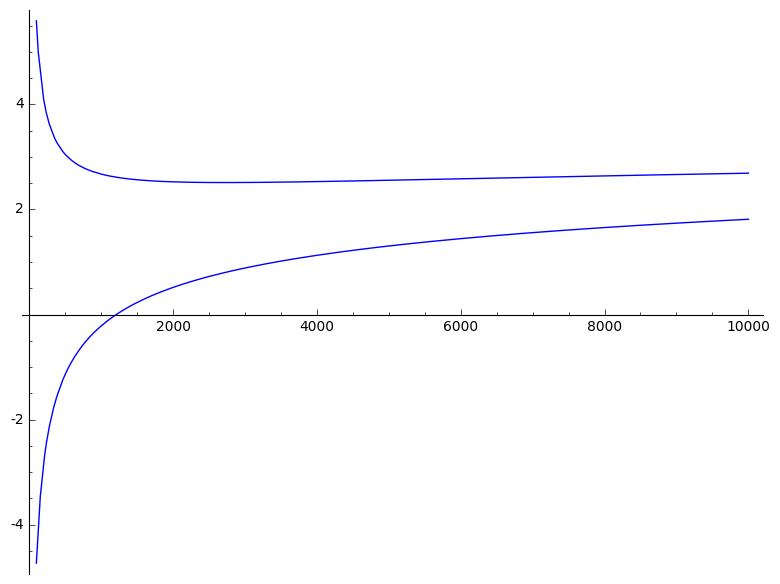

In [9]:
plot(mintermp(1,x),x,100,10000) + plot(maxtermp(1,x),x,100,10000)

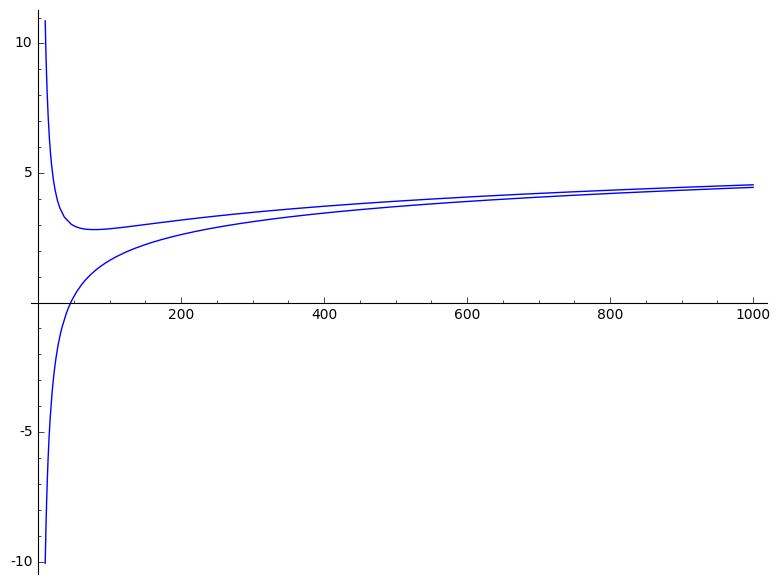

In [5]:
plot(mintermpsquare(1,x),x,10,1000) + plot(maxtermpsquare(1,x),x,10,1000)

<center>One finds the values $p \geq 1213$ (prime case) and $p \geq 47$ ($N=p^2$ case) respectively to ensure $\langle a_1,L' \rangle_N^{+,\rm{new}} >0$.</center>

In [7]:
(RDF(mintermp(1,1213)),RDF(mintermpsquare(1,47)))

(0.002385448318415806, 0.07314933568614615)

<center>Similarly for the second moments, the function __mintermpsquare__ is found to be increasing, and the starting value for which $\langle a_2,L'\rangle_N^{+,\textrm{new}}$ is proved to be positive is respectively $p \geq 5437$ and $p \geq 97$.</center>

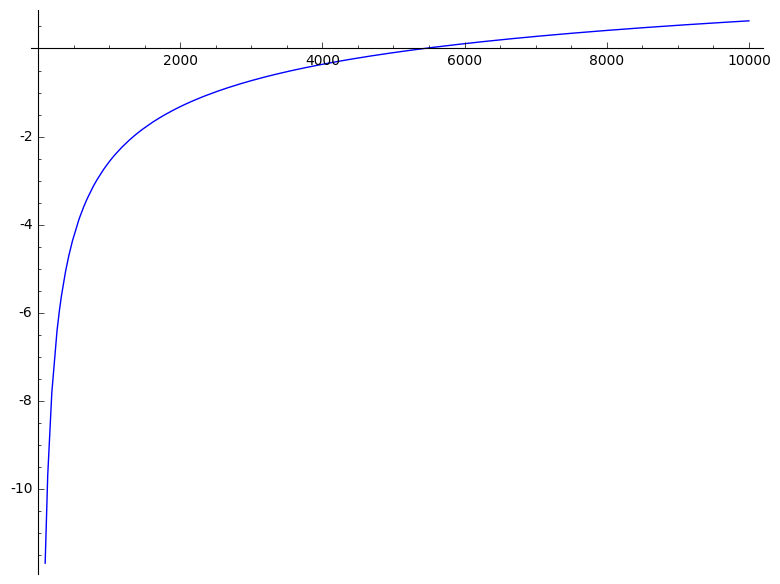

In [6]:
plot(mintermp(2,x),x,100,10000)

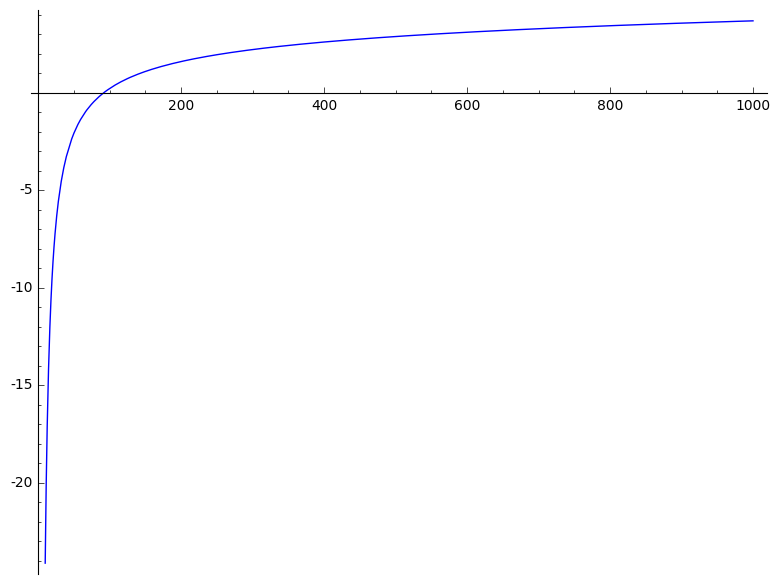

In [7]:
plot(mintermpsquare(2,x),x,10,1000)

In [9]:
(RDF(mintermp(2,5437)),RDF(mintermpsquare(2,97)))

(0.001000901959938405, 0.14873777511988034)

<center>Finally, to obtain Proposition 5.7, one bounds (in ranges where both terms are strictly positive, see above) the ratio 
$$
\frac{\langle a_2, L' \rangle_N^{+,\rm{new}}}{\langle a_1,L' \rangle_N^{+, \rm{new}}}
$$
    of the moments.</center>

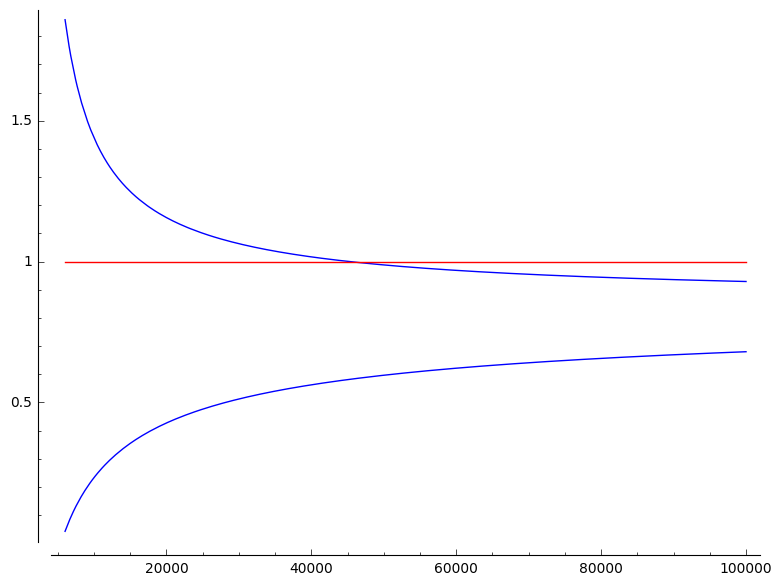

In [8]:
plot(maxtermp(2,x)/mintermp(1,x),x,6000,100000) + plot(mintermp(2,x)/maxtermp(1,x),x,6000,100000)+plot(1,x,6000,100000, color='red')

<center>The lower bound is known to be positive when $N \geq 5437$, thus there remains to bound above the upper bound by 1.</center>

In [11]:
RDF(maxtermp(2,45341)/mintermp(1,45341))

0.9999248318627628

<center>We have thus obtained the first part of Proposition 5.7, for level $p$. Let us plot the case $N=p^2$ now.</center>

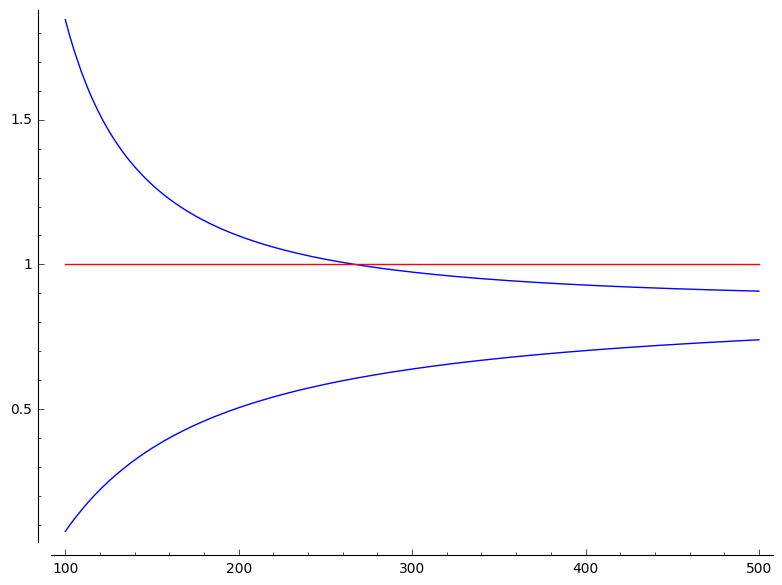

In [10]:
plot(maxtermpsquare(2,x)/mintermpsquare(1,x),x,100,500) + plot(mintermpsquare(2,x)/maxtermpsquare(1,x),x,100,500)+plot(1,x,100,500,color='red')

In [11]:
RDF(maxtermpsquare(2,269)/mintermpsquare(1,269))

0.9982755714209719

<center>Notice that the square of the bound obtained for $N=p^2$ is larger (but not too much larger) than the one obtained for $N=p$: this comes from the additional error terms in this context. Proposition 5.7 is thus proved, we now have to introduce the computations which improve those bounds.

The improved term relies on an optimum denoted as in the paper by 
$$
f(p)=\lfloor p/(2.5^2 E_1(2\pi/\sqrt{p})^2) \rfloor
$$
and we have then, assuming $p \geq 1000$, by the arguments of section 5.3,
$$
\frac{\langle a_1,L' \rangle_p^{+}}{4 \pi} = E_1 \left( \frac{2 \pi}{\sqrt{p}} \right) - \frac{6.3 \lambda}{\sqrt{p}} + O_1 \left( \frac{86}{p} + \frac{4 \pi}{\sqrt{p f(p)}} (\log(f(p))+4)  + \frac{8}{p} E_1 \left( \frac{2 \pi}{\sqrt{p}} \right) \left( \log(f(p))^2 + 3 \log(f(p)) + 1 \right) \right),
$$
with $\lambda$ between 0.4 and 1. For $m=2$, we similarly obtain
$$
\frac{\langle a_2,L' \rangle_p^{+}}{4 \pi} = E_1 \left( \frac{2 \pi}{\sqrt{p}} \right) - \frac{12.6 \lambda}{\sqrt{p}} + O_1 \left( \frac{213}{p} + \frac{8 \pi(2-1/\sqrt{2})}{\sqrt{p f(p)}} (\log(f(p))+4)  + \frac{16}{p} E_1 \left( \frac{2 \pi}{\sqrt{p}} \right) \left( \log(f(p))^2 + 3 \log(f(p)) + 1 \right) \right).
$$
    The same thing holds with $N=p^2$ everywhere (assumed $\geq 1000$) instead of $p$ for the $N=p^2$ part, and to restrict to the new part it is enough to replace the terms $43\sqrt{p}$ and $86/\sqrt{p}$ by the functions involving $f(N)$ in the first estimates given above. The functions resulting from these computations are __mintermpopt__$(m,p)$, __maxtermpopt__$(m,p)$, __mintermpsquareopt__$(m,p)$, __maxtermpsquareopt__$(m,p)$.</center>

In [12]:
def aux(x):
    return (x/(2.5^2*E1(2*pi/sqrt(x))^2))
def logaux(x):
    return log(aux(x))
def opterrortermT(m,x):
    Polyapart=8*m/x*E1(2*pi/sqrt(x))*(logaux(x)^2 + 3*logaux(x) + 1)
    if m==1:
        Weilpart=4*pi/(sqrt(x*aux(x)))*(logaux(x)+4)
    elif m==2:
        Weilpart=8*pi*(2-1/sqrt(2))/(sqrt(x*aux(x)))*(logaux(x)+4)
    return (Polyapart+Weilpart)

def mintermpopt(m,x):
    if m==1:
        return E1(2*pi*m/sqrt(x)) - 64/10*m/sqrt(x) - 86/x - opterrortermT(m,x)
    elif m==2:
        return E1(2*pi*m/sqrt(x)) - 64/10*m/sqrt(x) - 213/x - opterrortermT(m,x)

def maxtermpopt(m,x):
    if m==1:
        return E1(2*pi*m/sqrt(x)) - 64/10*4/10*m/sqrt(x) + 86/x + opterrortermT(m,x)
    elif m==2:
        return E1(2*pi*m/sqrt(x)) - 64/10*4/10*m/sqrt(x) + 213/x + opterrortermT(m,x)
    
def errortermpsquareopt(m,x):
    if m==1:
        return (86/x^2 + opterrortermT(m,x^2) + 86/(x*(x-1)) + 43/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(86/x + 43/sqrt(x)))
    elif m==2:
        return (213/x^2 + opterrortermT(m,x^2) + 213/(x*(x-1)) + 97/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(213/x + 97/sqrt(x)))
    else:
        return (86/x^2 + 43/x + 86/(x*(x-1)) + 43/(sqrt(x)*(x-1)) + ln(x)/(2*x-2)*(86/x + 43/sqrt(x)))*sumg(m)
    

def mintermpsquareopt(m,x):
    return maintermpsquare(m,x)-errortermpsquareopt(m,x)

def maxtermpsquareopt(m,x):
    return maintermpsquare(m,x)+errortermpsquareopt(m,x)

<center>The computations below thus give us $\langle a_1,L'\rangle_N^{+,\textrm{new}}>0$ for $N=p \geq 797$ or $N=p^2,p \geq 41$.</center>

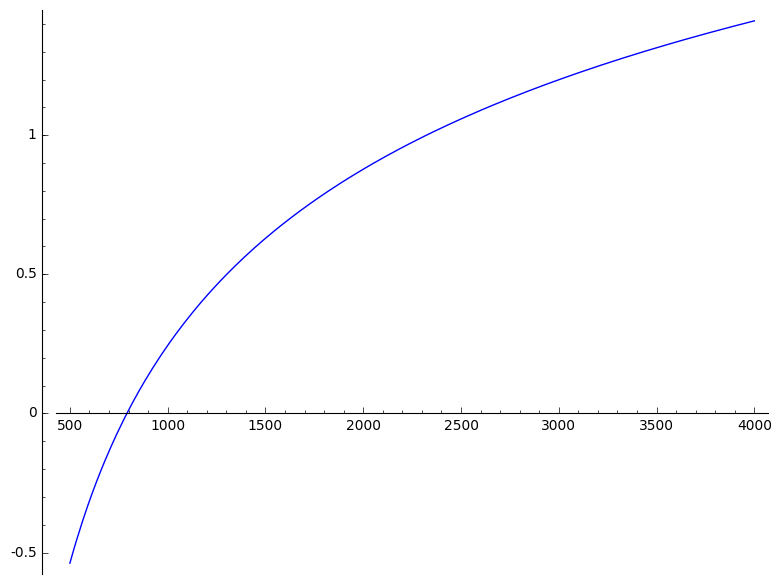

In [13]:
plot(mintermpopt(1,x),x,500,4000)

In [14]:
RDF(mintermpopt(1,797))

0.007561404069500455

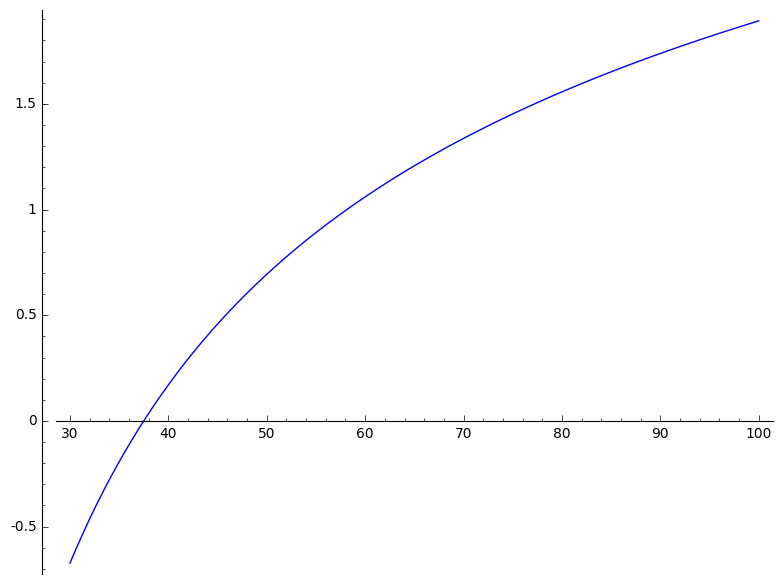

In [15]:
plot(mintermpsquareopt(1,x),x,30,100)

<center>Similarly, we obtain that $\langle a_2,L'\rangle_N^{+,\textrm{new}}>0$ for $N=p \geq 3001$ or $N=p^2,p \geq 71$.</center>

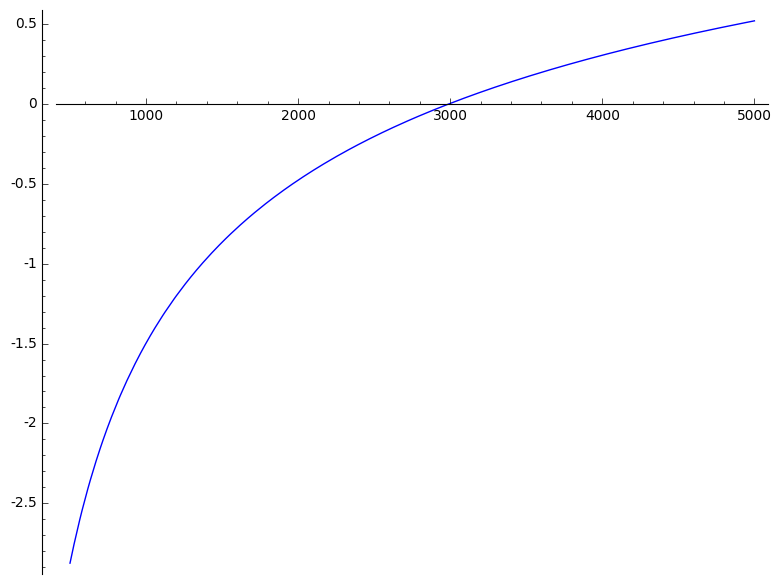

In [16]:
plot(mintermpopt(2,x),x,500,5000)

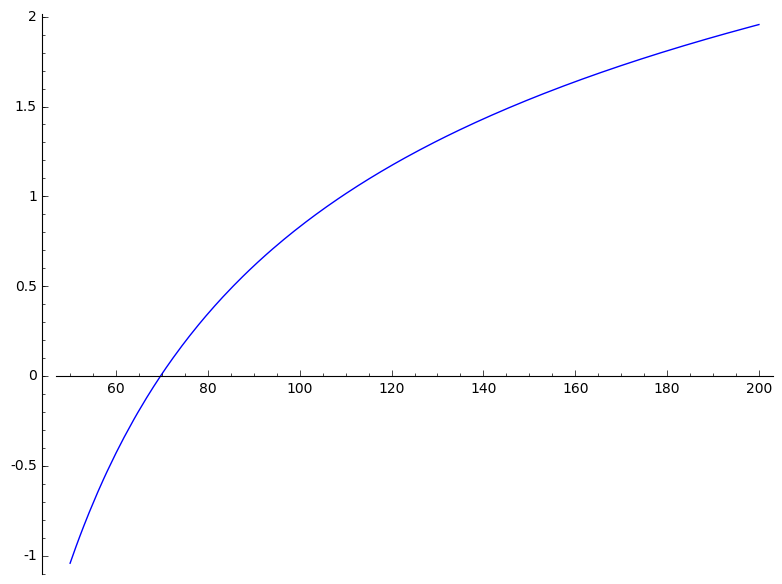

In [20]:
plot(mintermpsquareopt(2,x),x,50,200)

In [21]:
RDF(mintermpopt(2,3001)),RDF(mintermpsquareopt(2,71))

(0.003050774452251076, 0.04966810759705631)

<center>We can now compute the bounds for the ratio, in the ranges where the two terms are known to be positive.</center>

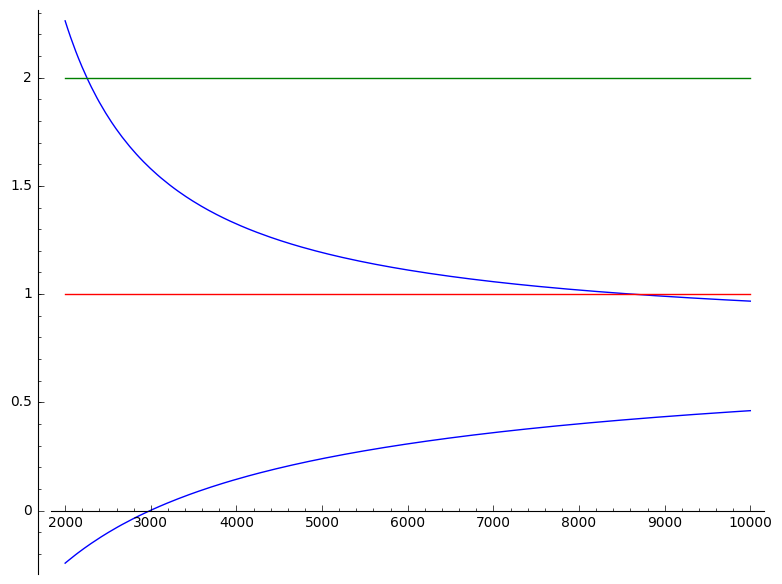

In [17]:
plot(mintermpopt(2,x)/maxtermpopt(1,x),x,2000,10000) + plot(maxtermpopt(2,x)/mintermpopt(1,x),x,2000,10000)+plot(1,x,2000,10000,color='red')+plot(2,x,2000,10000,color='green')

In [24]:
RDF(maxtermpopt(2,8641)/mintermpopt(1,8641))

(2.147040087603019, 0.9994535740289194)

<center>Finally, the ratio belongs to $]0,1[$ when $p \geq 8641$ and to $]0,2[$ when $p \geq 3001$.

For the $N=p^2$ case, the bounds is $p \geq 151$ to belong to $]0,1[$.
</center>

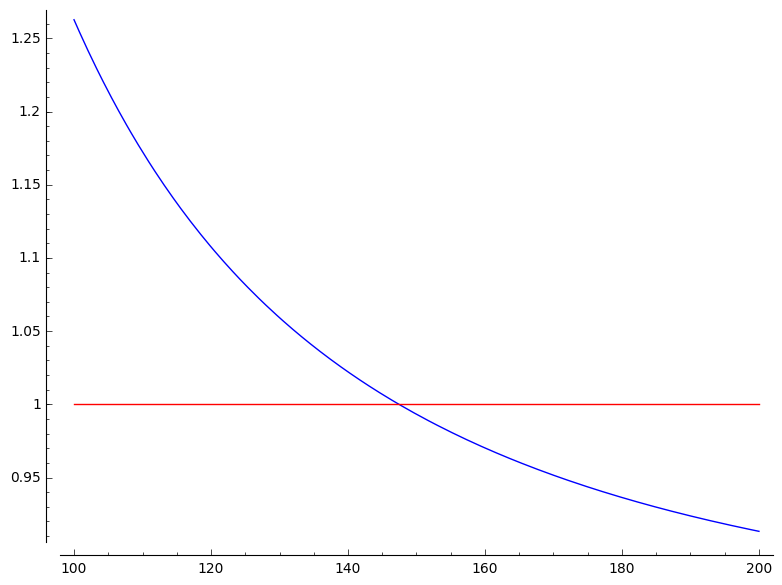

In [18]:
plot(maxtermpsquareopt(2,x)/mintermpsquareopt(1,x),x,100,200)+plot(1,x,100,200,color='red')

In [21]:
RDF(maxtermpsquareopt(2,151)/mintermpsquareopt(1,151))

0.990695607239477

In [28]:
c=CremonaDatabase()

In the ranges where it is known that at least one value of $L'(f,1)$ is nonzero, it is enough to prove that there are either no elliptic curve for this conductor with analytic rank 1, or at least two of them (see the end of section 5). This check can be run quickly through Cremona's database. as done below.

In [63]:
def checkcexamplethm(p):
    E=c.allcurves(p);
    l=sorted(E);
    chk=true;
    count=0;
    for i in E:
        r=E[i][1];
        if r==1:
            count=count+1;
        else:
            ;
        if count==2:
            chk=false;
            break
    if count==0:
        chk=false;
    return chk

def cexamplesthm(N1,N2):
    l=[];
    for p in [N1..N2]:
        if p in Primes():
            if checkcexamplethm(p):
                l=l+[p];
    return l

The list below is thus the list of all prime numbers in the intermediary range (797 to 8461) such that there is one and only one elliptic curve with this conductor and analytic rank exactly 1. There are 83 elements in that list.

In [85]:
from sage.misc.latex import list_function

In [82]:
print list_function(cexamplesthm(797,8641))

\left[797, 811, 827, 829, 997, 1051, 1091, 1259, 1439, 1549, 1607, 1747, 1811, 1949, 1973, 1987, 2017, 2089, 2141, 2161, 2221, 2269, 2341, 2357, 2539, 2557, 2609, 2699, 2749, 3023, 3109, 3163, 3229, 3251, 3313, 3347, 3391, 3469, 3547, 3797, 3803, 3851, 3853, 3877, 3931, 3947, 4021, 4051, 4493, 4507, 4603, 5237, 5309, 5443, 5503, 5563, 5653, 5717, 5867, 5987, 6011, 6131, 6199, 6373, 6427, 6689, 6691, 6823, 6967, 7019, 7187, 7213, 7219, 7283, 7699, 7723, 7757, 8069, 8101, 8167, 8419, 8597, 8623\right]


The code below produces the same results in level $N=p^2$. There are only two exceptions in the range $[41,151]$.

In [67]:
def checkcexamplethmsq(p):
    E=c.allcurves(p^2);
    l=sorted(E);
    chk=true;
    count=0;
    for i in E:
        r=E[i][1];
        if r==1:
            count=count+1;
        if count==2:
            chk=false;
            break
    if count==0:
        chk=false;
    return chk

def cexamplesthmsq(N1,N2):
    l=[];
    for p in [N1..N2]:
        if p in Primes():
            if checkcexamplethmsq(p):
                l=l+[p];
    return l

In [84]:
print list_function(cexamplesthmsq(41,151))

\left[53, 61\right]


These two lists of numbers are dealt with separately in another piece of code in MAGMA.